<a href="https://colab.research.google.com/github/cinjiangdy/ETH-Foundation-Grant-Proposal/blob/main/Programming_Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1

Part a

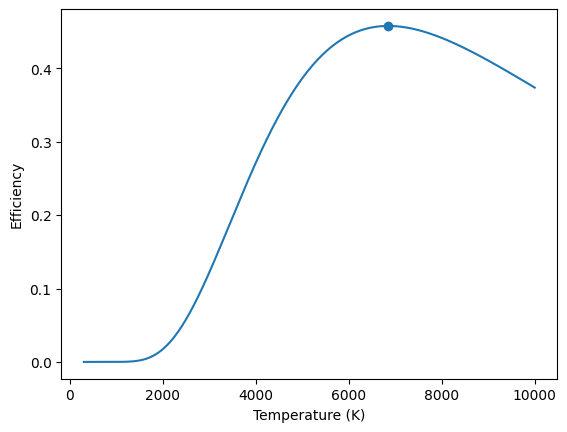

Max efficiency is 0.4577, at 6850.9018 K


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

h = 6.62607015e-34
c = 299792458
kB = 1.380649e-23
l1 = 390e-9
l2 = 750e-9
tvals = np.linspace(300, 10000, 500)

def planck_law(i, T):
    x = h * c / (i * kB * T)
    if x > 700:
      return 0
    return (2 * np.pi * h * c ** 2)*(i **(-5))*((np.exp(x) - 1)**(-1))

def integrate(f, a, b, N):
    h = (b - a) / N
    total = 0.5 * (f(a) + f(b))
    for k in range(1, N):
        total += f(a + k * h)
    return total * h

eta = []
for T in tvals:
    visible = integrate(lambda i: planck_law(i, T), l1, l2, 100)
    total = integrate(lambda i: planck_law(i, T), 1e-9, 3e-6, 100)
    eta.append(visible / total)

eta = np.array(eta)
maxe = np.argmax(eta)
maxe_t = tvals[maxe]
maxe_e = eta[maxe]

plt.plot(tvals, eta)
plt.scatter([maxe_t], [maxe_e])
plt.xlabel('Temperature (K)')
plt.ylabel('Efficiency')
plt.show()

print(f"Max efficiency is {maxe_e:.4f}, at {maxe_t:.4f} K")


Part b

In [ ]:
import numpy as np

h = 6.62607015e-34
c = 299792458
kB = 1.380649e-23
l1 = 390e-9
l2 = 750e-9

def planck_law(i, T):
    x = h * c / (i * kB * T)
    if x > 700:
      return 0
    return (2 * np.pi * h * c ** 2)*(i **(-5))*((np.exp(x) - 1)**(-1))

def efficiencycalculator(T):
    def integrate(f, a, b, N, T):
        h = (b - a) / N
        total = 0.5 * (f(a, T) + f(b, T))
        for k in range(1, N):
            total += f(a + k * h, T)
        return total * h

    visible = integrate(planck_law, l1, l2, 100, T)
    total = integrate(planck_law, 1e-9, 3e-6, 100, T)
    efficiency = visible / total
    return efficiency

def goldencalculator(f, a, b, tol):
    gr = (np.sqrt(5) + 1) / 2
    c = b - (b - a) / gr
    d = a + (b - a) / gr
    while abs(c - d) > tol:
        if f(c) < f(d):
            a = c
        else:
            b = d
        c = b - (b - a) / gr
        d = a + (b - a) / gr
    return (b + a) / 2

maxe_t_gr = goldencalculator(efficiencycalculator, 300, 10000, 1)
maxe_gr = efficiencycalculator(maxe_t_gr)

print(f"Using golden ratio: Maximum temperature = {maxe_t_gr:.1f}K, Efficiency = {maxe_gr:.4f}")


Using golden ratio: Maximum temperature = 6850.0K, Efficiency = 0.4577


Tungsten filaments usually operate between 2400-3300K. Given that the maximum effieciency temperature is much higher than this range, it is probably not safe to to operate at this level due to the limitations of tungsten. Tungsten also melts at 3695K.

Q2

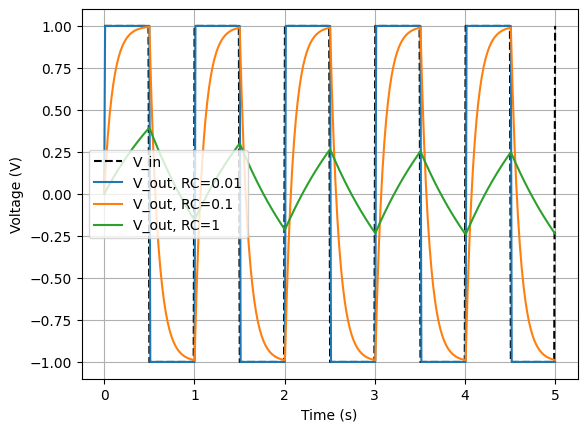

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

RC1 = 0.01
RC2 = 0.1
RC3 = 1
dt = 0.01
times = np.linspace(0, 5, 500)

def vin(t):
  if np.floor(2*t) % 2 == 0:
    return 1
  else:
    return -1

plt.plot(times, [vin(t) for t in times], label='V_in', linestyle='--', color='black')

vout_1 = np.zeros_like(times)
for i in range(1, len(times)):
    vout_1[i] = vout_1[i-1] + dt*(1/RC1)*(vin(times[i-1])-vout_1[i-1])

vout_2 = np.zeros_like(times)
for i in range(1, len(times)):
    vout_2[i] = vout_2[i-1] + dt*(1/RC2)*(vin(times[i-1])-vout_2[i-1])

vout_3 = np.zeros_like(times)
for i in range(1, len(times)):
    vout_3[i] = vout_3[i-1] + dt*(1/RC3)*(vin(times[i-1])-vout_3[i-1])

plt.plot(times, vout_1, label='V_out, RC=0.01')
plt.plot(times, vout_2, label='V_out, RC=0.1')
plt.plot(times, vout_3, label='V_out, RC=1')

plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.grid(True)
plt.show()

Part b

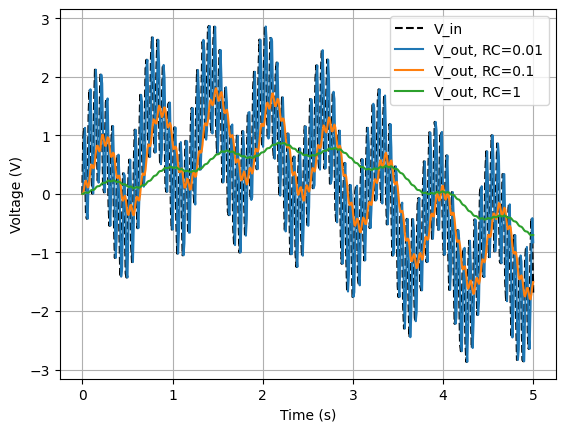

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

RC1 = 0.01
RC2 = 0.1
RC3 = 1
dt = 0.01
times = np.linspace(0, 5, 500)

def vin(t):
    return np.sin(t) + np.sin(10 * t) + np.sin(100 * t)

plt.plot(times, [vin(t) for t in times], label='V_in', linestyle='--', color='black')

vout_1 = np.zeros_like(times)
for i in range(1, len(times)):
    vout_1[i] = vout_1[i-1] + dt*(1/RC1)*(vin(times[i-1])-vout_1[i-1])

vout_2 = np.zeros_like(times)
for i in range(1, len(times)):
    vout_2[i] = vout_2[i-1] + dt*(1/RC2)*(vin(times[i-1])-vout_2[i-1])

vout_3 = np.zeros_like(times)
for i in range(1, len(times)):
    vout_3[i] = vout_3[i-1] + dt*(1/RC3)*(vin(times[i-1])-vout_3[i-1])

plt.plot(times, vout_1, label='V_out, RC=0.01')
plt.plot(times, vout_2, label='V_out, RC=0.1')
plt.plot(times, vout_3, label='V_out, RC=1')

plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.grid(True)
plt.show()


Part C:

Vin: Complex signal combining three different frequencies. Looks very bumpy rather than a simple sin wave due to high frequencies and interference patterns.

Vout, RC = 0.01: The output still resembles the input although it is slightly smoother. This setting and filter lets through some of the slow and fast waves, but it starts reducing height of the faster ones. Less bumpy due to small amount of filtering.

Vout, RC = 0.1: Smoother than the RC=0.01 due to higher dregree of filtering. Here, ther high frequency components are filtered out and smoothed more. However, you can still notice the signal quite clearly.

Vout, RC = 1: This produces the smoothest output signal out of all of the settings. The fast waves are quite hard to make out although they are still noticeable. Nonethless, this setting properly filters out the quick changes, makes the signal a lot smoother and it focuses on the slow changes in signal.

Overall, a low pass filter smoothes out the signal. A higher RC value will equate to a smoother output.








Question 3

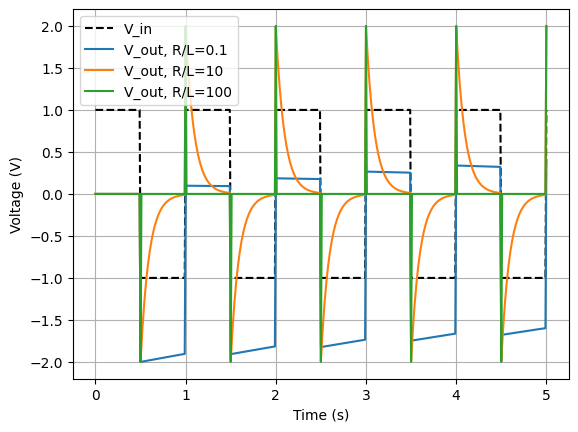

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

R_L1 = 0.1
R_L2 = 10
R_L3 = 100
dt = 0.01
time = np.linspace(0, 5, 501)

def vin(t):
  if np.floor(2*t) % 2 == 0:
    return 1
  else:
    return -1

def vinprime(t):
    return (vin(t + dt) - vin(t)) / dt

plt.plot(time, [vin(t) for t in time], label='V_in', linestyle='--', color='black')

vout_1, vout_2, vout_3 = np.zeros_like(time), np.zeros_like(time), np.zeros_like(time)

for i in range(1, len(time)):
    vout_1[i] = vout_1[i - 1] + dt*((vinprime(time[i - 1]) - R_L1*vout_1[i - 1]))
    vout_2[i] = vout_2[i - 1] + dt*((vinprime(time[i - 1]) - R_L2*vout_2[i - 1]))
    vout_3[i] = vout_3[i - 1] + dt*((vinprime(time[i - 1]) - R_L3*vout_3[i - 1]))

plt.plot(time, vout_1, label='V_out, R/L=0.1')
plt.plot(time, vout_2, label='V_out, R/L=10')
plt.plot(time, vout_3, label='V_out, R/L=100')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.grid(True)
plt.show()


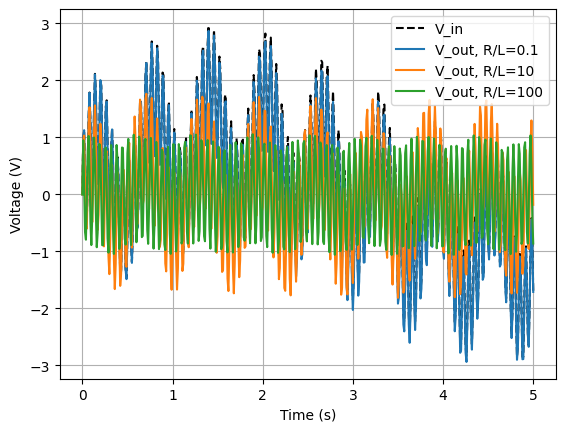

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

R_L1 = 0.1
R_L2 = 10
R_L3 = 100
dt = 0.01
time = np.linspace(0, 5, 501)

def vin(t):
    return np.sin(t) + np.sin(10 * t) + np.sin(100 * t)

def vinprime(t):
    return (vin(t + dt) - vin(t)) / dt

plt.plot(time, [vin(t) for t in time], label='V_in', linestyle='--', color='black')

vout_1, vout_2, vout_3 = np.zeros_like(time), np.zeros_like(time), np.zeros_like(time)

for i in range(1, len(time)):
    vout_1[i] = vout_1[i - 1] + dt*((vinprime(time[i - 1]) - R_L1*vout_1[i - 1]))
    vout_2[i] = vout_2[i - 1] + dt*((vinprime(time[i - 1]) - R_L2*vout_2[i - 1]))
    vout_3[i] = vout_3[i - 1] + dt*((vinprime(time[i - 1]) - R_L3*vout_3[i - 1]))

plt.plot(time, vout_1, label='V_out, R/L=0.1')
plt.plot(time, vout_2, label='V_out, R/L=10')
plt.plot(time, vout_3, label='V_out, R/L=100')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.grid(True)
plt.show()

V_out, R/L = 0.1: High frequencies like sin(100t) are more emphasized than the suprised waves from sin(t). Closely follows the input.

V_out, R/L = 10: Higher frequencies become more prominent, indicating the high-pass filter. Mid and low fequencies are more reduced

V_out, R/L = 100: most fequencies are greatly reduced. You see a much smoother output compared to the R/L = 0.1. The high frequency signal is let through, the small frequencies are almost fully blocked.

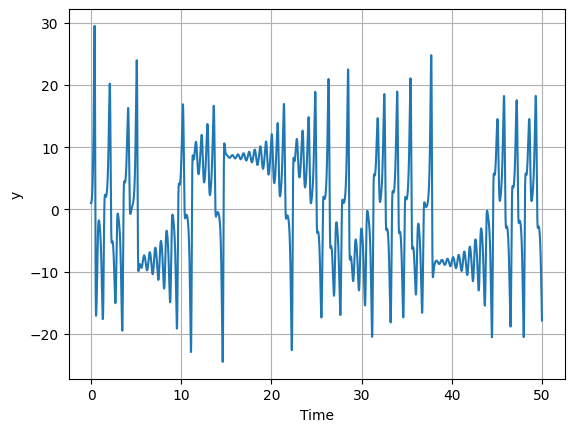

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

sigma = 10
rho = 28
beta = 8/3
dt = 0.01
times = np.arange(0, 50, dt)
x = np.zeros(5000)
y = np.zeros(5000)
z = np.zeros(5000)
x[0], y[0], z[0] = [0,1,0]

for i in range(1, 5000):
    x[i] = x[i-1] + dt*(sigma)*(y[i-1] - x[i-1])
    y[i] = y[i-1] + dt*(rho*(x[i-1]) - y[i-1] - x[i-1]*z[i-1])
    z[i] = z[i-1] + dt*(x[i-1]*y[i-1] - beta*z[i-1])

plt.plot(times, y)
plt.xlabel('Time')
plt.ylabel('y')
plt.grid(True)
plt.show()


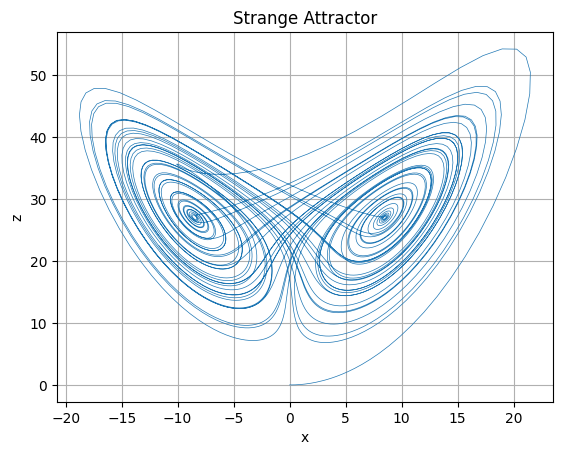

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

sigma = 10
rho = 28
beta = 8/3
dt = 0.01
times = np.arange(0, 50, dt)
x = np.zeros(5000)
y = np.zeros(5000)
z = np.zeros(5000)
x[0], y[0], z[0] = [0,1,0]

for i in range(1, 5000):
    x[i] = x[i-1] + dt*(sigma)*(y[i-1] - x[i-1])
    y[i] = y[i-1] + dt*(rho*(x[i-1]) - y[i-1] - x[i-1]*z[i-1])
    z[i] = z[i-1] + dt*(x[i-1]*y[i-1] - beta*z[i-1])

plt.plot(x, z, lw=0.5)
plt.title('Strange Attractor')
plt.xlabel('x')
plt.ylabel('z')
plt.grid(True)
plt.show()